###### From: https://www.google.com/search?q=how+to+find+candlestick+patterns+in+data+using+python&rlz=1C1VDKB_enUS947US947&oq=how+to+find+candlestick+patterns+in+data+using+python&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigATIHCAMQIRigATIHCAQQIRigATIHCAUQIRigATIHCAYQIRirAjIHCAcQIRifBTIHCAgQIRifBdIBCzEwMTQ1NGowajE1qAIIsAIB&sourceid=chrome&ie=UTF-8

## Candlestick Patterns
https://www.tastyfx.com/news/16-candlestick-patterns-every-trader-should-know-180615/


## TA-Lib - Technical Analysis Library
https://ta-lib.org/

## Environment: talib_env

In [1]:
import pandas as pd
import talib
import mplfinance as mpf
import pprint
import numpy as np

In [2]:
# Assuming your data is in a CSV file with columns 'Open', 'High', 'Low', 'Close'
data = pd.read_csv("data/SPDR S&P 500 ETF Trust Units_SPY_HistoricalData_20240830A.csv") 

In [3]:
data.rename(columns = {'Close/Last': 'Close'}, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume
0,8/29/2024,560.31,563.68,557.18,558.35,38715180
1,8/28/2024,561.21,561.65,555.04,558.30,41066020
2,8/27/2024,559.49,562.06,558.32,561.56,32693900
3,8/26/2024,563.18,563.91,559.05,560.79,35788610
4,8/23/2024,559.53,563.09,557.29,562.13,50639390


## Engulfing

In [4]:
# Detect a bullish engulfing pattern
data['engulfing'] = talib.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the engulfing pattern occurred
engulfing_dates = data[data['engulfing'] == 100].index

data[data['engulfing'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing
8,8/19/2024,554.73,559.61,553.860,559.61,39121790,100
28,7/22/2024,553.00,555.27,551.020,554.65,43346720,100
69,5/21/2024,529.28,531.52,529.070,531.36,33437000,100
135,2/15/2024,499.29,502.20,498.795,502.01,61682960,100
139,2/9/2024,498.84,501.65,498.490,501.20,63979380,100
...,...,...,...,...,...,...,...
2391,3/2/2015,210.78,212.06,210.720,211.99,87300760,100
2395,2/24/2015,211.12,212.05,210.760,211.81,72214030,100
2417,1/22/2015,203.99,206.26,202.330,206.10,173536400,100
2460,11/18/2014,204.44,205.92,204.440,205.55,75858730,100


In [5]:
# Get the index values
engulfing_index_values = np.where(data['engulfing'] == 100)[0].tolist()

print(engulfing_index_values)

[8, 28, 69, 135, 139, 144, 347, 366, 392, 408, 421, 460, 489, 521, 560, 563, 566, 601, 699, 717, 736, 743, 754, 770, 773, 789, 814, 845, 945, 976, 1109, 1112, 1165, 1170, 1233, 1273, 1282, 1284, 1348, 1386, 1401, 1509, 1573, 1577, 1651, 1658, 1665, 1696, 1705, 1719, 1731, 1849, 1852, 1866, 1911, 1941, 1990, 2001, 2004, 2013, 2039, 2117, 2184, 2197, 2208, 2240, 2253, 2274, 2277, 2334, 2379, 2383, 2391, 2395, 2417, 2460, 2512]


In [6]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  392
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\2411880134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engulfing_df['Date'] = pd.to_datetime(engulfing_df['Date'])  # Ensure the column is in datetime format


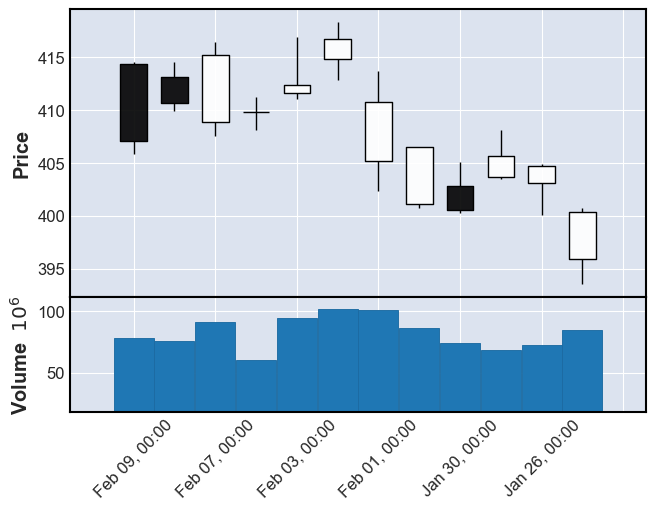

In [7]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
engulfing_df = data.iloc[low_value:high_value]

engulfing_df['Date'] = pd.to_datetime(engulfing_df['Date'])  # Ensure the column is in datetime format
engulfing_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(engulfing_df, type='candle', volume=True)

## Hammer

In [8]:
# Detect a hammer pattern
data['hammer'] = talib.CDLHAMMER(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the hammer pattern occurred
hammer_dates = data[data['hammer'] == 100].index

data[data['hammer'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer
28,7/22/2024,553.00,555.27,551.020,554.650,43346720,100,100
71,5/17/2024,528.81,529.52,527.320,529.450,59187590,0,100
104,4/2/2024,518.24,518.98,516.480,518.840,74230310,0,100
107,3/27/2024,521.71,523.21,519.485,523.170,82999780,0,100
140,2/8/2024,498.10,498.71,497.260,498.320,52343640,0,100
...,...,...,...,...,...,...,...,...
2262,9/2/2015,194.62,195.46,192.420,195.410,159445200,0,100
2280,8/7/2015,208.16,208.34,206.870,207.950,117703500,0,100
2295,7/17/2015,212.29,212.55,211.800,212.480,88094480,0,100
2369,4/1/2015,206.39,206.42,204.510,205.700,137055500,0,100


In [9]:
# Get the index values
hammer_values = np.where(data['hammer'] == 100)[0].tolist()

print(hammer_values)

[28, 71, 104, 107, 140, 142, 152, 172, 187, 356, 400, 516, 605, 647, 662, 667, 697, 769, 781, 798, 841, 854, 871, 896, 905, 923, 926, 942, 944, 968, 978, 991, 1006, 1009, 1010, 1026, 1072, 1074, 1103, 1141, 1149, 1177, 1190, 1198, 1245, 1251, 1285, 1299, 1318, 1326, 1355, 1482, 1510, 1583, 1630, 1644, 1655, 1659, 1663, 1690, 1700, 1727, 1812, 1816, 1824, 1842, 1878, 1907, 1944, 2008, 2042, 2063, 2101, 2149, 2161, 2173, 2178, 2182, 2191, 2203, 2262, 2280, 2295, 2369, 2396]


In [10]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  841
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\91968768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hammer_df['Date'] = pd.to_datetime(hammer_df['Date'])  # Ensure the column is in datetime format


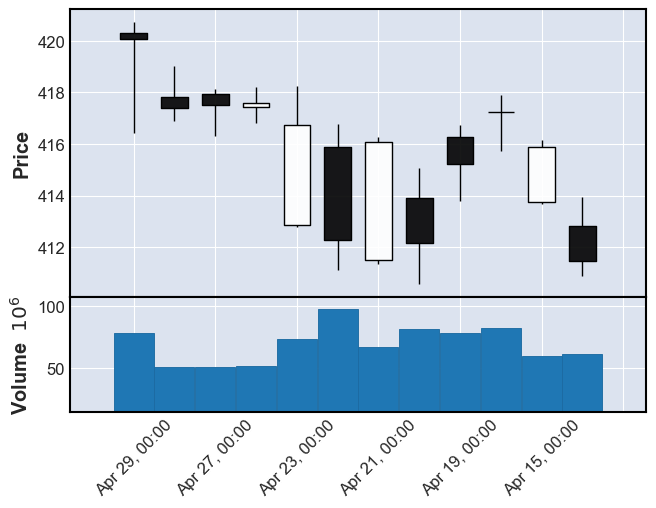

In [11]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
hammer_df = data.iloc[low_value:high_value]

hammer_df['Date'] = pd.to_datetime(hammer_df['Date'])  # Ensure the column is in datetime format
hammer_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(hammer_df, type='candle', volume=True)

## Inverse Hammer

In [12]:
# Detect an inverse hammer pattern
data['inverse_hammer'] = talib.CDLINVERTEDHAMMER(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the inverse hammer pattern occurred
inverse_hammer_dates = data[data['inverse_hammer'] == 100].index

data[data['inverse_hammer'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer
24,7/26/2024,542.280,547.1900,541.4900,544.44,53763790,0,0,100
25,7/25/2024,541.350,547.4550,537.4500,538.41,61158290,0,0,100
34,7/12/2024,557.630,563.6700,557.1500,559.99,53084410,0,0,100
37,7/9/2024,556.260,557.1800,555.5200,555.82,27314130,0,0,100
205,11/3/2023,433.140,436.2900,433.0100,434.69,100167800,0,0,100
223,10/10/2023,432.940,437.2200,432.5300,434.54,78607270,0,0,100
329,5/9/2023,411.130,412.0900,410.6894,410.93,49220120,0,0,100
449,11/14/2022,396.660,400.1799,394.8300,395.12,71893170,0,0,100
550,6/22/2022,370.620,378.7200,370.1800,374.39,90059420,0,0,100
668,12/31/2021,475.640,476.8600,474.6700,474.96,65237430,0,0,100


In [13]:
# Get the index values
inverse_hammer_values = np.where(data['inverse_hammer'] == 100)[0].tolist()

print(inverse_hammer_values)

[24, 25, 34, 37, 205, 223, 329, 449, 550, 668, 800, 801, 859, 906, 914, 984, 1095, 1127, 1151, 1160, 1216, 1310, 1374, 1377, 1449, 1477, 1486, 1495, 1565, 1607, 1820, 1848, 1965, 2060, 2071, 2435]


In [14]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  550
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\4027220945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inverse_hammer_df['Date'] = pd.to_datetime(inverse_hammer_df['Date'])  # Ensure the column is in datetime format


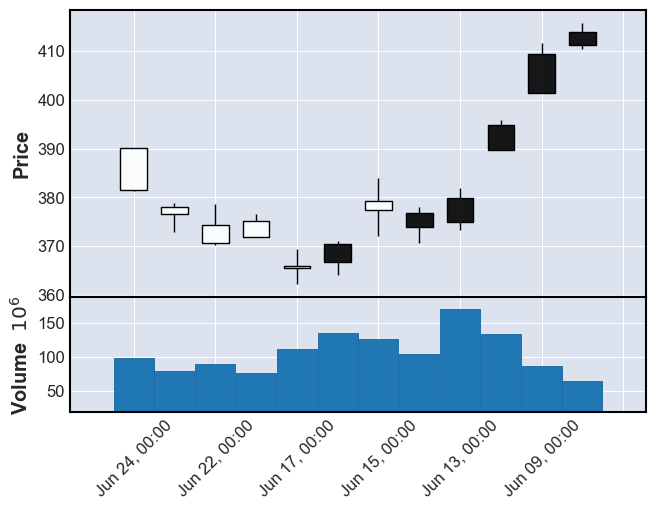

In [15]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
inverse_hammer_df = data.iloc[low_value:high_value]

inverse_hammer_df['Date'] = pd.to_datetime(inverse_hammer_df['Date'])  # Ensure the column is in datetime format
inverse_hammer_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(inverse_hammer_df, type='candle', volume=True)

## Piercing Pattern

In [16]:
# Detect a piercing pattern
data['piercing'] = talib.CDLPIERCING(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the piercing pattern occurred
piercing_dates = data[data['piercing'] == 100].index

data[data['piercing'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing
303,6/15/2023,436.330,443.90,436.230,442.60,110303100,0,0,0,100
471,10/13/2022,349.205,367.51,348.110,365.97,147254500,0,0,0,100
679,12/15/2021,463.420,470.86,460.740,470.60,116899300,0,0,0,100
877,3/5/2021,380.460,384.76,372.640,383.63,152039600,0,0,0,100
881,3/1/2021,385.590,390.92,380.572,389.58,105348800,0,0,0,100
2407,2/5/2015,204.860,206.30,204.770,206.12,97236260,0,0,0,100
2480,10/21/2014,191.680,194.20,191.480,194.07,153368100,0,0,0,100


In [17]:
# Get the index values
piercing_index_values = np.where(data['piercing'] == 100)[0].tolist()

print(piercing_index_values)

[303, 471, 679, 877, 881, 2407, 2480]


In [18]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  2407
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\4150618594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piercing_df['Date'] = pd.to_datetime(piercing_df['Date'])  # Ensure the column is in datetime format


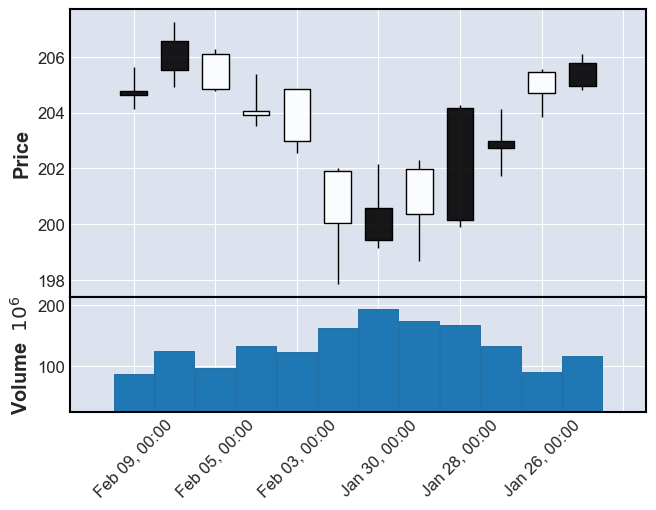

In [19]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
piercing_df = data.iloc[low_value:high_value]

piercing_df['Date'] = pd.to_datetime(piercing_df['Date'])  # Ensure the column is in datetime format
piercing_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(piercing_df, type='candle', volume=True)

## Morning Star

In [20]:
# Detect a morning star pattern
data['morning_star'] = talib.CDLMORNINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the morning star pattern occurred
morning_star_dates = data[data['morning_star'] == 100].index

data[data['morning_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star
2170,1/14/2016,189.55,193.26,187.66,191.93,239613400,0,0,0,0,100


In [21]:
# Get the index values
morning_star_index_values = np.where(data['morning_star'] == 100)[0].tolist()

print(morning_star_index_values)

[2170]


In [22]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  2170
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\970771053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_star_df['Date'] = pd.to_datetime(morning_star_df['Date'])  # Ensure the column is in datetime format


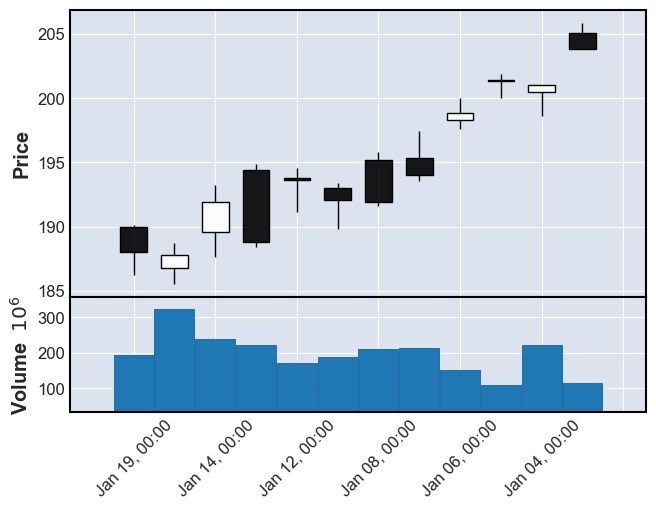

In [23]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
morning_star_df = data.iloc[low_value:high_value]

morning_star_df['Date'] = pd.to_datetime(morning_star_df['Date'])  # Ensure the column is in datetime format
morning_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(morning_star_df, type='candle', volume=True)

## Three Advancing White Soldiers

In [24]:
# Detect a three advancing white soldiers pattern
data['3adv_white_soldiers'] = talib.CDL3WHITESOLDIERS(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the three advancing white soldiers pattern occurred
three_adv_white_soldiers_dates = data[data['3adv_white_soldiers'] == 100].index

data[data['3adv_white_soldiers'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers


In [25]:
# Get the index values
three_adv_white_soldiers_index_values = np.where(data['3adv_white_soldiers'] == 100)[0].tolist()

print(three_adv_white_soldiers_index_values)

[]


In [26]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\1690260306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_adv_white_soldiers_df['Date'] = pd.to_datetime(three_adv_white_soldiers_df['Date'])  # Ensure the column is in datetime format


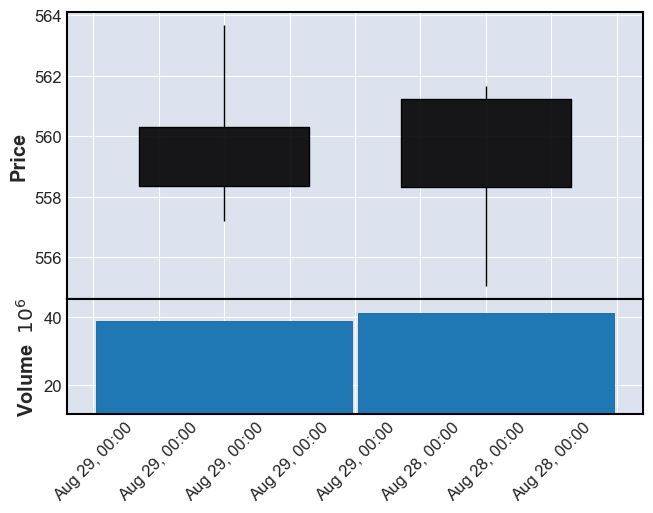

In [27]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
three_adv_white_soldiers_df = data.iloc[low_value:high_value]

three_adv_white_soldiers_df['Date'] = pd.to_datetime(three_adv_white_soldiers_df['Date'])  # Ensure the column is in datetime format
three_adv_white_soldiers_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(three_adv_white_soldiers_df, type='candle', volume=True)

## Hanging Man

In [28]:
# Detect a hanging man pattern
data['hanging_man'] = talib.CDLHANGINGMAN(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the hanging man pattern occurred
hanging_man_dates = data[data['hanging_man'] == 100].index

data[data['hanging_man'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man


In [29]:
# Get the index values
hanging_man_index_values = np.where(data['hanging_man'] == 100)[0].tolist()

print(hanging_man_index_values)

[]


In [30]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\2515793326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hanging_man_df['Date'] = pd.to_datetime(hanging_man_df['Date'])  # Ensure the column is in datetime format


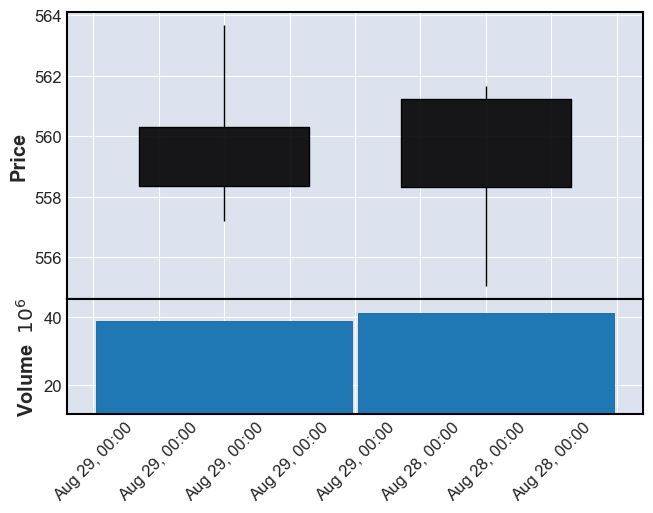

In [31]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
hanging_man_df = data.iloc[low_value:high_value]

hanging_man_df['Date'] = pd.to_datetime(hanging_man_df['Date'])  # Ensure the column is in datetime format
hanging_man_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(hanging_man_df, type='candle', volume=True)

## Shooting Star

In [32]:
# Detect a shooting star pattern
data['shooting_star'] = talib.CDLSHOOTINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the shooting star pattern occurred
shooting_star_dates = data[data['shooting_star'] == 100].index

data[data['shooting_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star


In [33]:
# Get the index values
shooting_star_index_values = np.where(data['shooting_star'] == 100)[0].tolist()

print(shooting_star_index_values)

[]


In [34]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\4011686296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_star_df['Date'] = pd.to_datetime(shooting_star_df['Date'])  # Ensure the column is in datetime format


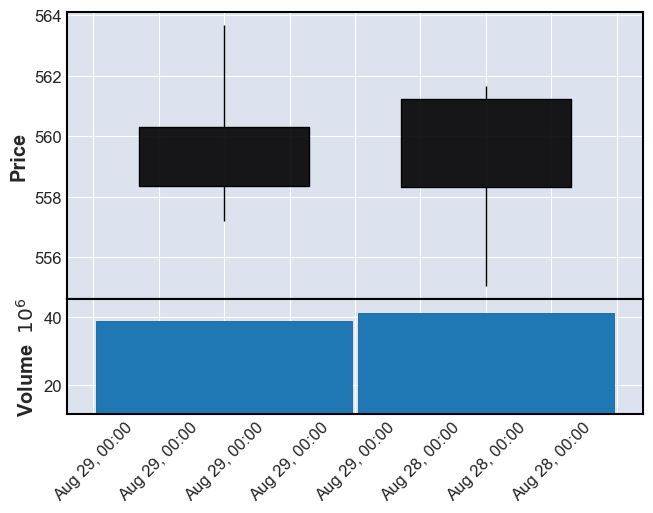

In [35]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
shooting_star_df = data.iloc[low_value:high_value]

shooting_star_df['Date'] = pd.to_datetime(shooting_star_df['Date'])  # Ensure the column is in datetime format
shooting_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(shooting_star_df, type='candle', volume=True)

## Evening Star

In [36]:
# Detect an evening star pattern
data['evening_star'] = talib.CDLEVENINGSTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the evening star pattern occurred
evening_star_dates = data[data['evening_star'] == 100].index

data[data['evening_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star


In [37]:
# Get the index values
evening_star_index_values = np.where(data['evening_star'] == 100)[0].tolist()

print(evening_star_index_values)

[]


In [38]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\1820039369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_star_df['Date'] = pd.to_datetime(evening_star_df['Date'])  # Ensure the column is in datetime format


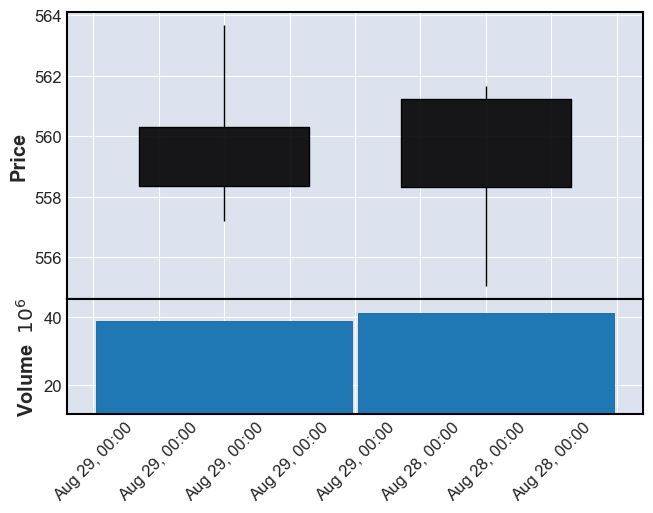

In [39]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
evening_star_df = data.iloc[low_value:high_value]

evening_star_df['Date'] = pd.to_datetime(evening_star_df['Date'])  # Ensure the column is in datetime format
evening_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(evening_star_df, type='candle', volume=True)

## Evening Doji Star

In [40]:
# Detect an evening doji star pattern
data['evening_doji_star'] = talib.CDLEVENINGDOJISTAR(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the evening doji star pattern occurred
evening_doji_star_dates = data[data['evening_doji_star'] == 100].index

data[data['evening_doji_star'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star


In [41]:
# Get the index values
evening_doji_star_index_values = np.where(data['evening_doji_star'] == 100)[0].tolist()

print(evening_doji_star_index_values)

[]


In [42]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\3396305443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_doji_star_df['Date'] = pd.to_datetime(evening_doji_star_df['Date'])  # Ensure the column is in datetime format


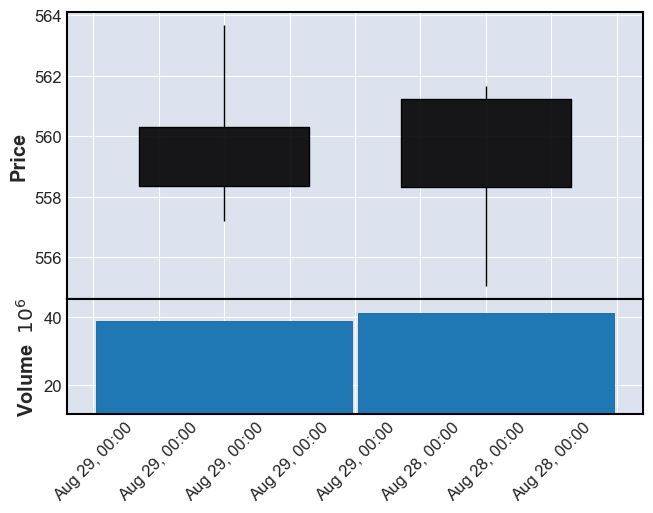

In [43]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
evening_doji_star_df = data.iloc[low_value:high_value]

evening_doji_star_df['Date'] = pd.to_datetime(evening_doji_star_df['Date'])  # Ensure the column is in datetime format
evening_doji_star_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(evening_doji_star_df, type='candle', volume=True)

## Three Black Crows

In [44]:
# Detect a three black crows pattern
data['three_black_crows'] = talib.CDL3BLACKCROWS(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the three black crows pattern occurred
three_black_crows_dates = data[data['three_black_crows'] == 100].index

data[data['three_black_crows'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows


In [45]:
# Get the index values
three_black_crows_index_values = np.where(data['three_black_crows'] == 100)[0].tolist()

print(three_black_crows_index_values)

[]


In [46]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\1152123449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_black_crows_df['Date'] = pd.to_datetime(three_black_crows_df['Date'])  # Ensure the column is in datetime format


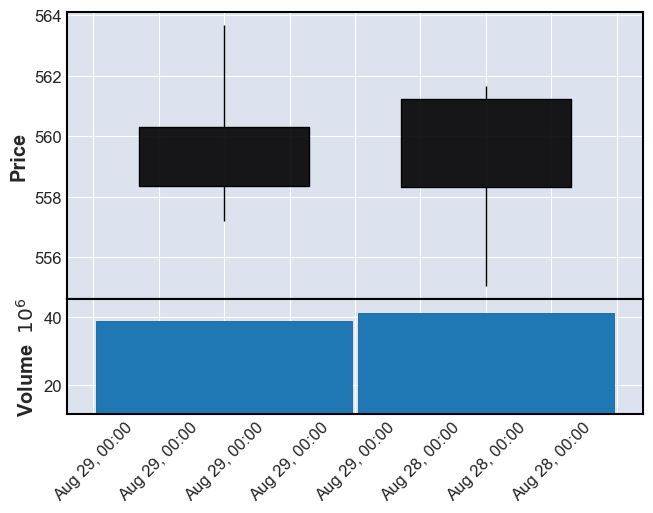

In [47]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
three_black_crows_df = data.iloc[low_value:high_value]

three_black_crows_df['Date'] = pd.to_datetime(three_black_crows_df['Date'])  # Ensure the column is in datetime format
three_black_crows_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(three_black_crows_df, type='candle', volume=True)

## Dark Cloud Cover

In [48]:
# Detect a dark cloud cover pattern
data['dark_cloud_cover'] = talib.CDLDARKCLOUDCOVER(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the dark cloud cover pattern occurred
dark_cloud_cover_dates = data[data['dark_cloud_cover'] == 100].index

data[data['dark_cloud_cover'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover


In [49]:
# Get the index values
dark_cloud_cover_index_values = np.where(data['dark_cloud_cover'] == 100)[0].tolist()

print(dark_cloud_cover_index_values)

[]


In [50]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\2387346891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dark_cloud_cover_df['Date'] = pd.to_datetime(dark_cloud_cover_df['Date'])  # Ensure the column is in datetime format


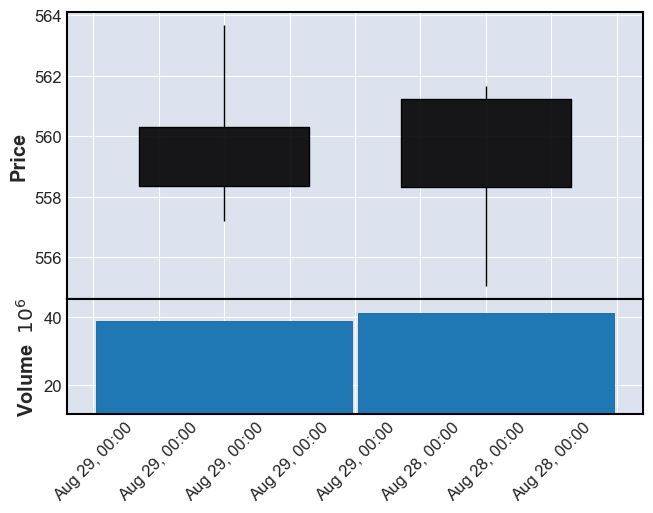

In [51]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
dark_cloud_cover_df = data.iloc[low_value:high_value]

dark_cloud_cover_df['Date'] = pd.to_datetime(dark_cloud_cover_df['Date'])  # Ensure the column is in datetime format
dark_cloud_cover_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(dark_cloud_cover_df, type='candle', volume=True)

## Doji

In [52]:
# Detect a doji pattern
data['doji'] = talib.CDLDOJI(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the doji pattern occurred
doji_dates = data[data['doji'] == 100].index.tolist()

data[data['doji'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover,doji
27,7/23/2024,554.54,556.7350,553.275,553.780,34439560,0,0,0,0,0,0,0,-100,0,0,0,0,100
33,7/15/2024,562.03,564.8371,559.630,561.530,40584290,0,0,0,0,0,0,0,0,0,0,0,0,100
37,7/9/2024,556.26,557.1800,555.520,555.820,27314130,0,0,100,0,0,0,0,0,0,0,0,0,100
38,7/8/2024,555.44,556.2501,554.190,555.280,36110450,0,0,0,0,0,0,0,0,0,0,0,0,100
42,7/1/2024,545.63,545.8800,542.520,545.340,40297810,0,0,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,11/13/2014,204.16,204.8300,203.210,204.190,84981760,0,0,0,0,0,0,0,0,0,0,0,0,100
2482,10/17/2014,188.42,189.7500,187.620,188.470,214147600,0,0,0,0,0,0,0,0,0,0,0,0,100
2493,10/2/2014,194.18,195.0550,192.350,194.380,157161800,0,0,0,0,0,0,0,0,0,0,0,0,100
2504,9/17/2014,200.77,201.6800,199.750,200.750,149647200,0,0,0,0,0,0,0,0,0,0,0,0,100


In [53]:
# Get the index values
doji_index_values = np.where(data['doji'] == 100)[0].tolist()

print(doji_index_values)

[27, 33, 37, 38, 42, 48, 54, 57, 58, 64, 65, 81, 85, 98, 100, 104, 106, 109, 124, 126, 128, 138, 140, 147, 149, 157, 168, 171, 176, 190, 191, 192, 193, 202, 204, 226, 238, 242, 244, 272, 273, 281, 289, 290, 298, 301, 304, 307, 317, 320, 327, 329, 330, 335, 341, 346, 352, 356, 358, 372, 374, 377, 393, 409, 433, 441, 444, 456, 459, 462, 467, 473, 492, 503, 507, 520, 528, 552, 565, 572, 575, 581, 588, 600, 602, 605, 614, 625, 638, 660, 664, 670, 680, 691, 696, 697, 710, 716, 727, 735, 742, 748, 751, 758, 763, 765, 767, 768, 769, 786, 797, 800, 809, 816, 820, 827, 836, 838, 839, 840, 842, 848, 867, 874, 886, 907, 909, 913, 921, 923, 929, 930, 937, 939, 943, 946, 954, 957, 961, 967, 969, 970, 1007, 1009, 1015, 1017, 1031, 1036, 1063, 1066, 1085, 1087, 1100, 1101, 1113, 1122, 1127, 1137, 1139, 1140, 1141, 1142, 1144, 1148, 1161, 1164, 1198, 1210, 1225, 1227, 1228, 1249, 1253, 1256, 1264, 1266, 1268, 1281, 1286, 1293, 1306, 1307, 1310, 1311, 1312, 1322, 1327, 1329, 1337, 1344, 1346, 1350, 135

In [54]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1337
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\318927622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doji_df['Date'] = pd.to_datetime(doji_df['Date'])  # Ensure the column is in datetime format


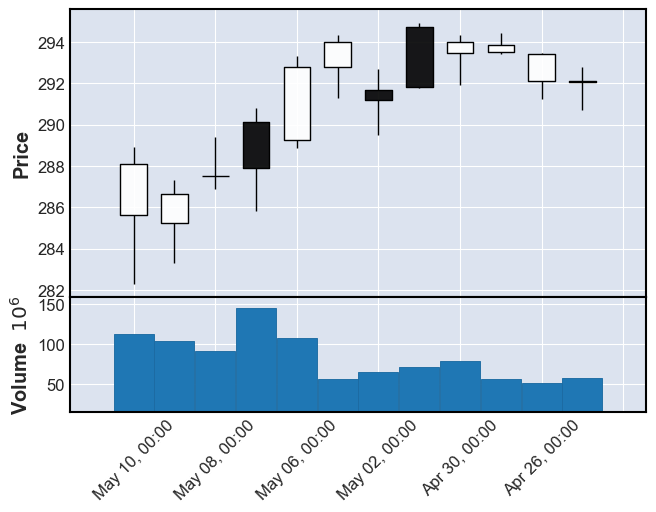

In [55]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
doji_df = data.iloc[low_value:high_value]

doji_df['Date'] = pd.to_datetime(doji_df['Date'])  # Ensure the column is in datetime format
doji_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(doji_df, type='candle', volume=True)

## Spinning Top

In [56]:
# Detect a spinning top pattern
data['spinning_top'] = talib.CDLSPINNINGTOP(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the spinning top pattern occurred
spinning_top_dates = data[data['spinning_top'] == 100].index

# Get the index values
spinning_top_values = np.where(data['doji'] == 100)[0].tolist()

data[data['spinning_top'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,morning_star,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover,doji,spinning_top
11,8/14/2024,542.850,544.9600,540.120,543.750,42446930,0,0,0,0,0,0,0,0,0,0,0,0,0,100
48,6/21/2024,544.400,545.6500,543.020,544.510,64513860,0,0,0,0,0,0,0,0,0,0,0,0,100,100
57,6/7/2024,533.660,536.8900,532.535,534.010,43224530,0,0,0,0,0,0,0,0,0,0,0,0,100,100
81,5/3/2024,511.160,512.5500,508.560,511.290,72756710,0,0,0,0,0,0,0,0,0,0,0,0,100,100
90,4/22/2024,497.830,502.3800,495.430,499.720,67961050,0,0,0,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,11/11/2014,204.055,204.3100,203.650,204.175,54294510,0,0,0,0,0,0,0,0,0,0,0,0,0,100
2467,11/7/2014,203.170,203.5999,202.610,203.340,89443040,0,0,0,0,0,0,0,0,0,0,0,0,0,100
2478,10/23/2014,194.620,196.2000,194.260,194.930,153664900,0,0,0,0,0,0,0,0,0,0,0,0,0,100
2482,10/17/2014,188.420,189.7500,187.620,188.470,214147600,0,0,0,0,0,0,0,0,0,0,0,0,100,100


In [57]:
# Get the index values
spinning_top_index_values = np.where(data['spinning_top'] == 100)[0].tolist()

print(spinning_top_index_values)

[11, 48, 57, 81, 90, 98, 126, 140, 147, 156, 163, 166, 175, 185, 192, 193, 195, 204, 213, 214, 226, 229, 238, 242, 244, 253, 254, 267, 272, 276, 278, 281, 290, 298, 304, 320, 327, 335, 341, 342, 368, 372, 387, 393, 409, 415, 424, 432, 433, 453, 492, 503, 511, 539, 541, 544, 552, 554, 572, 575, 577, 581, 584, 588, 595, 614, 625, 644, 652, 664, 670, 680, 691, 723, 738, 748, 758, 768, 800, 805, 809, 810, 815, 820, 827, 842, 848, 860, 875, 909, 930, 937, 939, 941, 946, 950, 954, 955, 957, 961, 996, 1014, 1016, 1017, 1025, 1063, 1066, 1096, 1101, 1104, 1113, 1115, 1119, 1120, 1141, 1142, 1148, 1179, 1183, 1184, 1206, 1210, 1225, 1227, 1228, 1230, 1247, 1249, 1256, 1266, 1286, 1294, 1301, 1302, 1308, 1311, 1312, 1327, 1337, 1354, 1364, 1365, 1367, 1368, 1387, 1394, 1408, 1409, 1414, 1419, 1439, 1445, 1449, 1459, 1475, 1481, 1486, 1489, 1500, 1507, 1514, 1515, 1516, 1524, 1565, 1569, 1575, 1579, 1581, 1589, 1591, 1604, 1608, 1611, 1622, 1647, 1648, 1670, 1673, 1679, 1684, 1688, 1700, 1703, 17

In [58]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1741
Enter amount to subtract from target index:  2
Enter amount to add to target index:  10


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\3467033171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spinning_top_df['Date'] = pd.to_datetime(spinning_top_df['Date'])  # Ensure the column is in datetime format


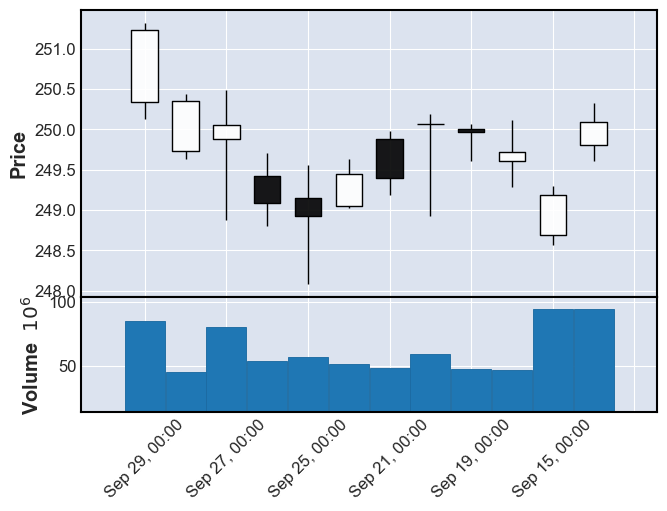

In [59]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
spinning_top_df = data.iloc[low_value:high_value]

spinning_top_df['Date'] = pd.to_datetime(spinning_top_df['Date'])  # Ensure the column is in datetime format
spinning_top_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(spinning_top_df, type='candle', volume=True)

## Rising/Falling Three Methods

In [60]:
# Detect a rising falling three methods pattern
data['rising_falling_three_methods'] = talib.CDLRISEFALL3METHODS(data['Open'], data['High'], data['Low'], data['Close'])

# Get the dates where the rising falling three methods pattern occurred
rising_falling_three_methods_dates = data[data['rising_falling_three_methods'] == 100].index

data[data['rising_falling_three_methods'] == 100]

,Date,Open,High,Low,Close,Volume,engulfing,hammer,inverse_hammer,piercing,...,3adv_white_soldiers,hanging_man,shooting_star,evening_star,evening_doji_star,three_black_crows,dark_cloud_cover,doji,spinning_top,rising_falling_three_methods


In [61]:
# Get the index values
rising_falling_three_methods_index_values = np.where(data['rising_falling_three_methods'] == 100)[0].tolist()

print(rising_falling_three_methods_index_values)

[]


In [62]:
target_index = input("Enter target index: ")
subtract_from = input("Enter amount to subtract from target index: ")
add_to = input("Enter amount to add to target index: ")

Enter target index:  1
Enter amount to subtract from target index:  1
Enter amount to add to target index:  1


C:\Users\jjel0\AppData\Local\Temp\ipykernel_35000\3425068432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rising_falling_three_methods_df['Date'] = pd.to_datetime(rising_falling_three_methods_df['Date'])  # Ensure the column is in datetime format


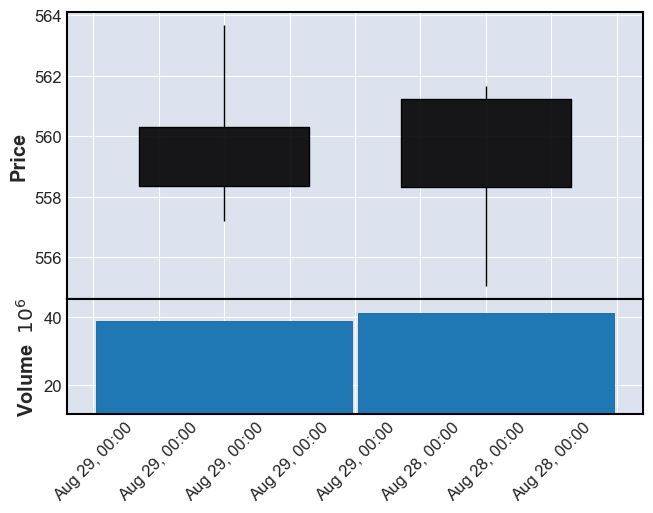

In [63]:
low_value = int(target_index) - int(subtract_from)
high_value = int(target_index) + int(add_to)
rising_falling_three_methods_df = data.iloc[low_value:high_value]

rising_falling_three_methods_df['Date'] = pd.to_datetime(rising_falling_three_methods_df['Date'])  # Ensure the column is in datetime format
rising_falling_three_methods_df.set_index('Date', inplace=True)       # Set the column as the DataFrame index

# Create a candlestick chart
mpf.plot(rising_falling_three_methods_df, type='candle', volume=True)

## Plotting

In [64]:
data['Date'] = pd.to_datetime(data['Date'])  # Ensure the column is in datetime format
data.set_index('Date', inplace=True)       # Set the column as the DataFrame index

In [65]:
# Filter the last 100 rows
last_100_rows = data.tail(100)

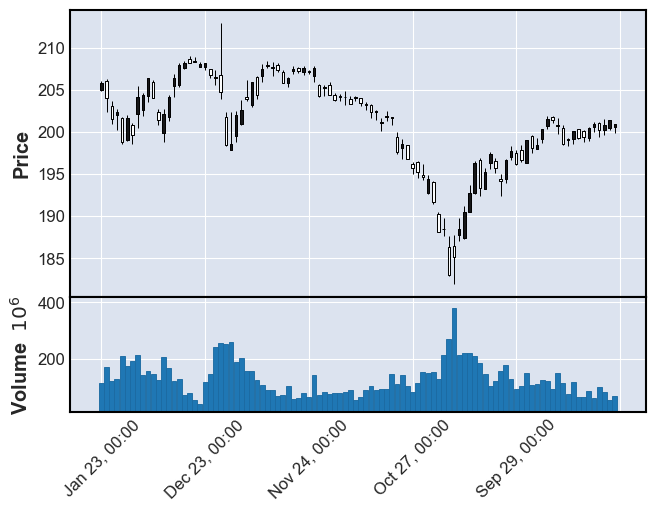

In [66]:
# Create a candlestick chart
mpf.plot(last_100_rows, type='candle', volume=True)

In [67]:
# Filter the last 10 rows
last_10_rows = data.tail(10)

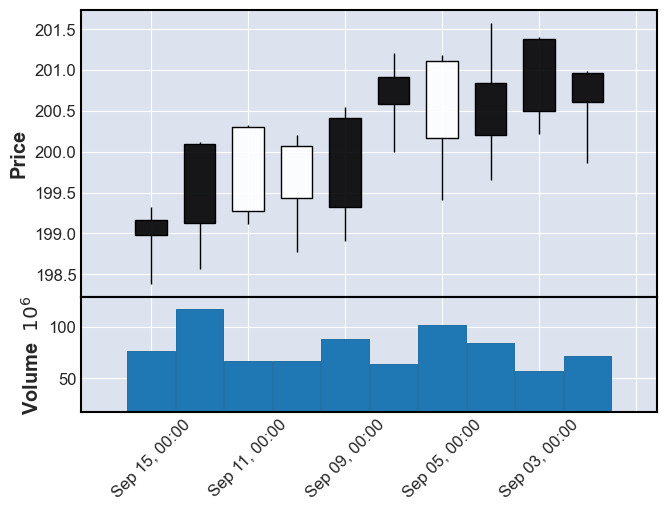

In [68]:
# Create a candlestick chart
mpf.plot(last_10_rows, type='candle', volume=True)